In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import random as rnd


import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset
from datetime import timedelta
from statsmodels.tsa.ar_model import AutoReg

%matplotlib inline

In [2]:
diet_df = pd.read_csv('../datasets/time_series/diet_search.csv')
diet_df.index = pd.to_datetime(diet_df['Month'])
diet_df = diet_df.drop("Month", axis = 1)
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2004-01-01 to 2021-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rate    207 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [3]:
diet_df

rate
Month           
2004-01-01   100
2004-02-01    78
2004-03-01    71
2004-04-01    69
2004-05-01    74
...          ...
2020-11-01    34
2020-12-01    32
2021-01-01    42
2021-02-01    40
2021-03-01    40

[207 rows x 1 columns]

In [4]:
diet_df.columns

Index(['rate'], dtype='object')

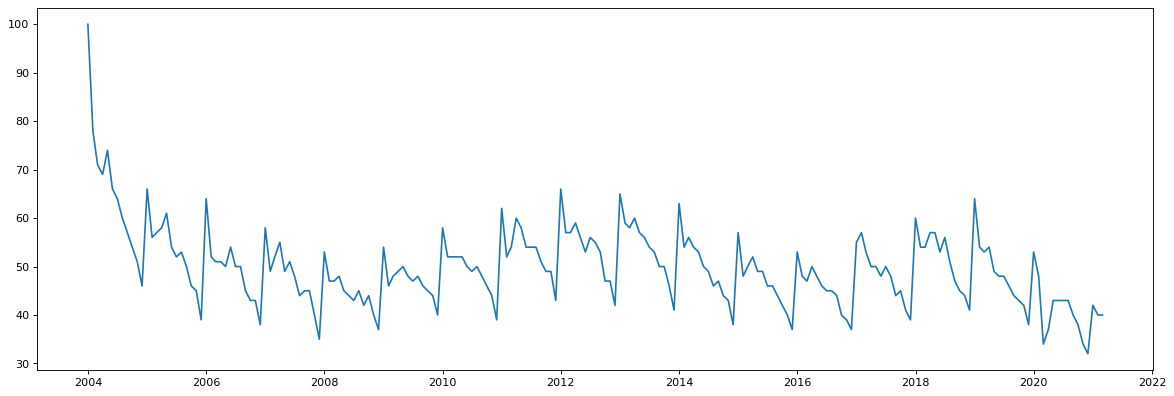

In [5]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(diet_df.index, diet_df['rate'])

Text(0.5, 1.0, 'Percentage change')

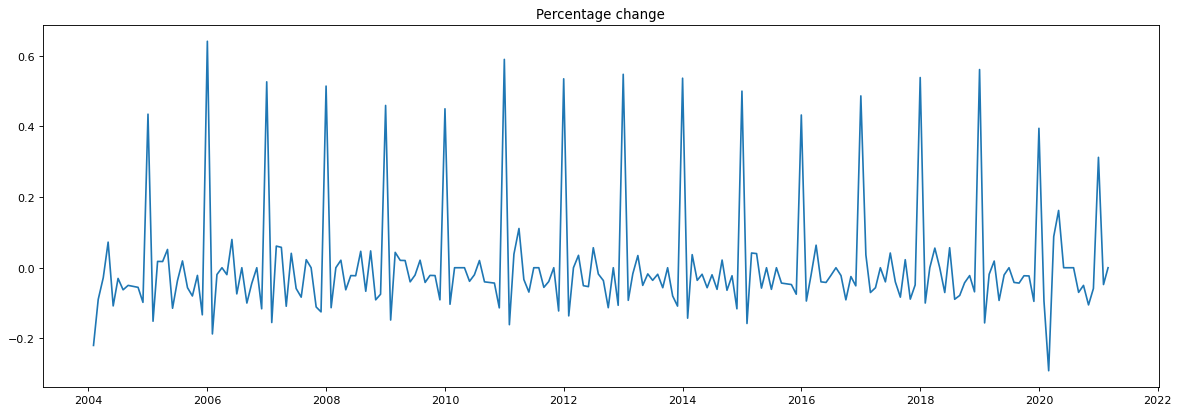

In [6]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(diet_df.index, diet_df['rate'].pct_change())
plt.title('Percentage change')

In [7]:
#always check correlation by their percent changes

x = np.random.rand(100)
y = np.random.rand(100)

xy = {'col1': x, 'col2':y}
xy = pd.DataFrame(data=xy)

print("Correlation by level ",xy['col1'].corr(xy['col2']))

changes = xy.pct_change()
print("Correlation by percent changes ", changes['col1'].corr(changes['col2']))

Correlation by level  -0.15878251988861455
Correlation by percent changes  -0.03708293406004273


### Correlation by level vs percent changes

In [8]:
#grabbing 2012 and 2013 search rate
diet2012 = diet_df.loc['2012']
diet2013 = diet_df.loc['2013']
diet2012 = diet2012.reset_index()
diet2013 = diet2013.reset_index()
diet_test = {'col2012': diet2012['rate'], 'col2013':diet2013['rate']}
diet_test = pd.DataFrame(data=diet_test)
diet_test

col2012  col2013
0        66       65
1        57       59
2        57       58
3        59       60
4        56       57
5        53       56
6        56       54
7        55       53
8        53       50
9        47       50
10       47       46
11       42       41

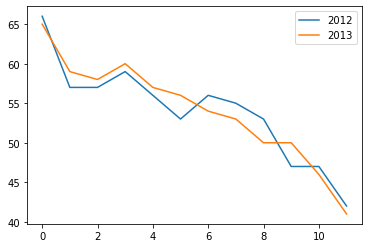

In [9]:
plt.plot(diet_test['col2012'], label="2012")
plt.plot(diet_test['col2013'], label="2013")
plt.legend()

In [10]:
print("Correlation by level ",diet_test['col2012'].corr(diet_test['col2013']))

changes = diet_test.pct_change()
print("Correlation by percent changes ", changes['col2012'].corr(changes['col2013']))

Correlation by level  0.9517850986192126
Correlation by percent changes  0.46614433450612935


##### There may be high correlation by level between 2 process, however, they may or nay not related to eachother
##### In this particular case, they do related to each other

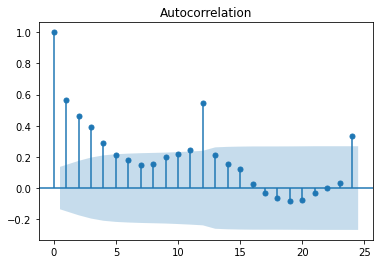

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_acf(diet_df['rate'])
pyplot.show()
# temperatures are heavily correlated, especially every 12 month (obviously)

### Linear Regression
##### It is obvious that lin reg is not the best choice in time series forcasting, this is just a demo on the entire dataset
##### Which is badly effected by outliners and can not represent sine wave-like flucuations

In [12]:
diet_df = pd.read_csv('../datasets/time_series/diet_search.csv')
diet_df.index = pd.to_datetime(diet_df['Month'])
diet_df = diet_df.drop("Month", axis = 1)
diet_df.index = diet_df.index.to_julian_date() #converting from datetime to numerical for linear regression
diet_df

rate
Month          
2453005.5   100
2453036.5    78
2453065.5    71
2453096.5    69
2453126.5    74
...         ...
2459154.5    34
2459184.5    32
2459215.5    42
2459246.5    40
2459274.5    40

[207 rows x 1 columns]

score 0.1310681073023937
coef [-0.00165437]
intercept 4113.165150398642


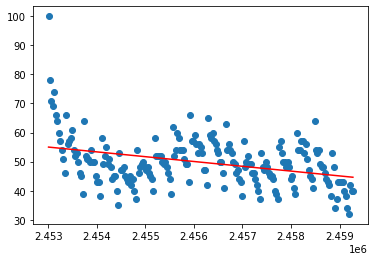

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
#y = np.dot(X, np.array([1, 2])) + 3
X = np.array(diet_df.index).reshape(-1,1) #2d array
y = diet_df['rate']


reg = LinearRegression().fit(X, y)
print("score",reg.score(X, y))
print('coef',reg.coef_)
print('intercept',reg.intercept_)

plt.scatter(X,y)
plt.plot(X, reg.predict(X),color='r')

#### Linear Regression for each year separately, however, is a good solution to predict the outcome

In [14]:
diet_df = pd.read_csv('../datasets/time_series/diet_search.csv')
diet_df.index = pd.to_datetime(diet_df['Month'])
diet_df = diet_df.drop("Month", axis = 1)
#diet_df.index = diet_df.index.to_julian_date() #converting from datetime to numerical for linear regression
diet2012 = diet_df.loc['2012']
diet2013 = diet_df.loc['2013']
diet2012.index = diet2012.index.to_julian_date()
diet2013.index = diet2013.index.to_julian_date()

score 0.8191543250261692
coef [-0.05206991]
intercept 127942.63195255886


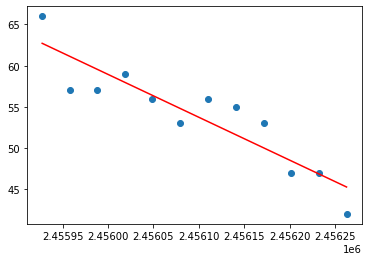

In [15]:
#2012

X = np.array(diet2012.index).reshape(-1,1) #2d array
y = diet2012['rate']

reg = LinearRegression().fit(X, y)

print("score",reg.score(X, y))
print('coef',reg.coef_)
print('intercept',reg.intercept_)

plt.scatter(X,y)
plt.plot(X, reg.predict(X),color='r')

score 0.9208835497910571
coef [-0.05760933]
intercept 141569.0934972405


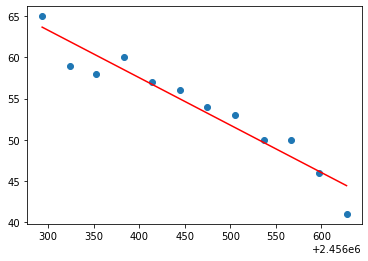

In [16]:
#2013

X = np.array(diet2013.index).reshape(-1,1) #2d array
y = diet2013['rate']

reg = LinearRegression().fit(X, y)

print("score",reg.score(X, y))
print('coef',reg.coef_)
print('intercept',reg.intercept_)

plt.scatter(X,y)
plt.plot(X, reg.predict(X),color='r')

#### Predicting with an AR(24) model

In [46]:
y = diet_df['rate']

In [57]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y, lags=24, trend='n', seasonal = True, period = 24)
results = model.fit()
results.summary()

C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\maidu\.conda\envs\tf\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   rate   No. Observations:                  207
Model:              Seas. AutoReg(24)   Log Likelihood                -385.354
Method:               Conditional MLE   S.D. of innovations              1.987
Date:                Sat, 15 May 2021   AIC                              1.909
Time:                        14:50:57   BIC                              2.769
Sample:                    01-01-2006   HQIC                             2.258
                         - 03-01-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
seasonal.0     17.1754      2.929      5.865      0.000      11.435      22.915
seasonal.1      4.3679      3.264      1.338      0.181      -2.029      10.765
seasonal.2      3.9243      3.238      1.212      0.226      -2.423      10.272
seasonal.3      6.8838      3.336      2.064      0.039       0.346      13.421
seasonal.4     11.4134      3.353      3.404      0.001       4.842      17.985
seasonal.5      3.2069      3.440      0.932      0.351      -3.535       9.949
seasonal.6      5.1474      3.430      1.501      0.133      -1.576      11.871
seasonal.7      6.9567      3.463      2.009      0.045       0.170      13.743
seasonal.8      2.6085      3.329      0.784      0.433      -3.917       9.134
seasonal.9      3.9866      3.310      1.204      0.228      -2.501      10.474
seasonal.10    -1.2734      3.286     -0.388      0.698      -7.713       5.167
seasonal.11    -1.5424      3.238     -0.476      0.634      -7.889       4.805
seasonal.12    17.8760      2.829      6.320      0.000      12.332      23.420
seasonal.13     5.2962      3.224      1.643      0.100      -1.023      11.616
seasonal.14     6.2621      3.194      1.960      0.050       0.001      12.523
seasonal.15     8.8235      3.366      2.622      0.009       2.227      15.420
seasonal.16    10.0342      3.399      2.952      0.003       3.373      16.695
seasonal.17     3.0467      3.456      0.881      0.378      -3.728       9.821
seasonal.18     4.8166      3.449      1.397      0.163      -1.943      11.576
seasonal.19     6.6453      3.480      1.909      0.056      -0.176      13.466
seasonal.20     1.8410      3.343      0.551      0.582      -4.711       8.393
seasonal.21     5.2995      3.307      1.603      0.109      -1.182      11.780
seasonal.22    -1.8993      3.301     -0.575      0.565      -8.370       4.571
seasonal.23    -2.8026      3.258     -0.860      0.390      -9.189       3.583
rate.L1         0.4996      0.074      6.748      0.000       0.354       0.645
rate.L2         0.2073      0.082      2.516      0.012       0.046       0.369
rate.L3         0.0106      0.085      0.125      0.900      -0.156       0.177
rate.L4        -0.0689      0.085     -0.815      0.415      -0.235       0.097
rate.L5         0.1606      0.084      1.902      0.057      -0.005       0.326
rate.L6         0.1168      0.085      1.372      0.170      -0.050       0.284
rate.L7        -0.0431      0.085     -0.505      0.614      -0.210       0.124
rate.L8         0.0620      0.084      0.740      0.459      -0.102       0.226
rate.L9         0.0768      0.084      0.917      0.359      -0.087       0.241
rate.L10        0.2853      0.084      3.397      0.001       0.121       0.450
rate.L11       -0.1367      0.087     -1.580      0.114      -0.306       0.033
rate.L12        0.0628      0.088      0.713      0.476      -0.110       0.236
rate.L13       -0.1486      0.093     -1.596      0.111      -0.331       0.034
rate.L14       -0.1041      0.095     -1.

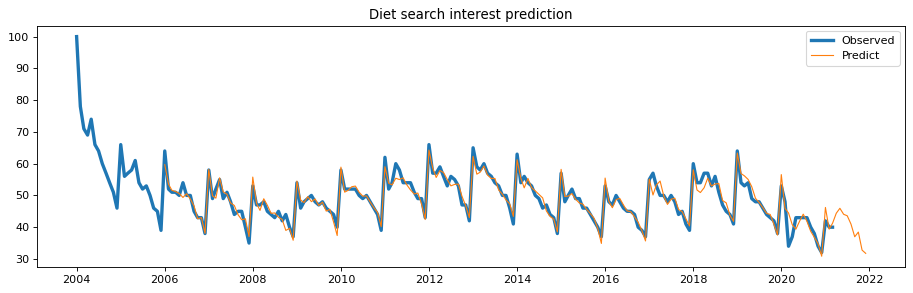

In [54]:

figure(figsize=(14, 4), dpi=80)
y_pred = results.predict(end=215)
plt.plot(y, label='Observed',linewidth=3)
plt.plot(y_pred, label = 'Predict', linewidth=1)
plt.title("Diet search interest prediction")
plt.legend()

In [55]:
y_pred[200:]

2020-09-01    38.701343
2020-10-01    36.814249
2020-11-01    34.790623
2020-12-01    30.854001
2021-01-01    46.216060
2021-02-01    39.373071
2021-03-01    41.233176
2021-04-01    44.392541
2021-05-01    45.951048
2021-06-01    44.060891
2021-07-01    43.588567
2021-08-01    40.976300
2021-09-01    36.984053
2021-10-01    38.457061
2021-11-01    32.780157
2021-12-01    31.761948
Freq: MS, dtype: float64

In [59]:
y.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', name='Month', length=207, freq=None)